## TP 3 - Visión por Computadora 1

### Carrera de Especialización en Inteligencia Artificial - Cohorte 17

### Autora: Micozzi, María Luz - a1707

Encontrar el logotipo de la gaseosa dentro de las imágenes provistas en Material_TPs/TP3/images a partir del template Material_TPs/TP3/template

1. (4 puntos) Obtener una detección del logo en cada imagen sin falsos positivos
2. (4 puntos) Plantear y validar un algoritmo para múltiples detecciones en la imagen coca_multi.png con el mismo témplate del ítem 1
3. (2 puntos) Generalizar el algoritmo del item 2 para todas las imágenes

Visualizar los resultados con bounding boxes en cada imagen mostrando el nivel de confianza de la detección.

In [1]:
# imports
import numpy as np
import cv2 as cv
from matplotlib import colors
import matplotlib.pyplot as plt

import sys
sys.path.append('../utils')
from functions import read_images, read_image, show_images, show_images_grey_scale

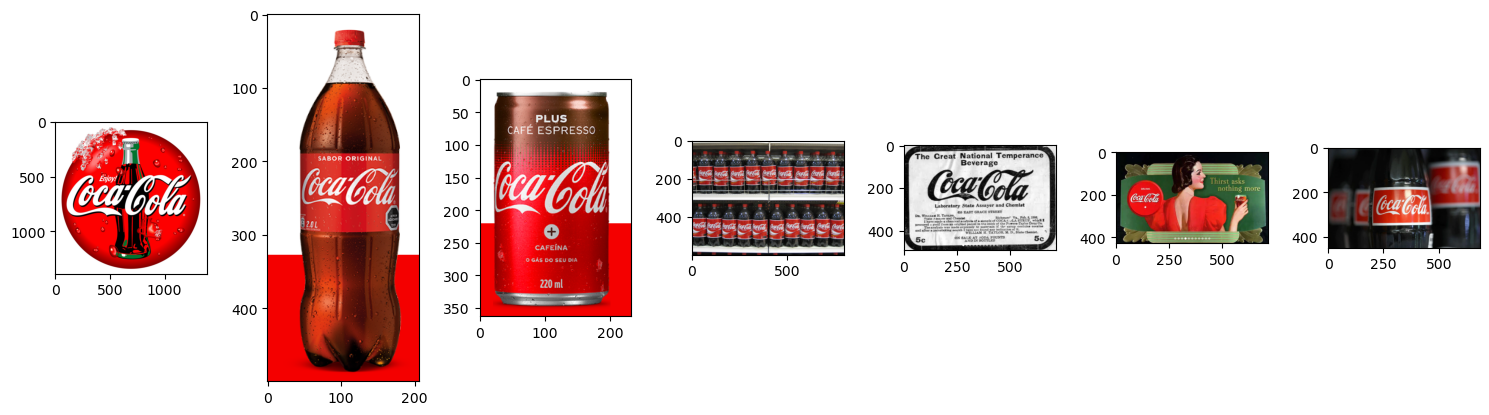

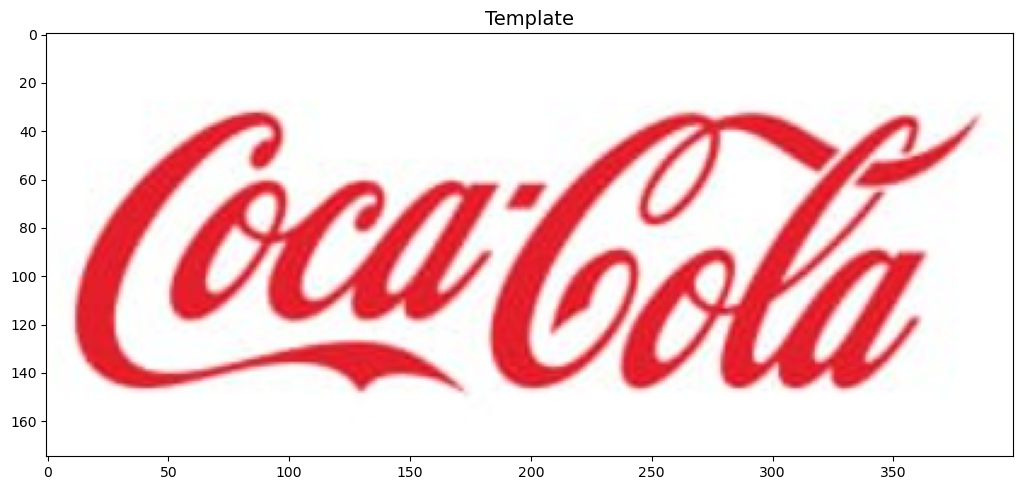

In [2]:
# leemos y mostramos las imágenes y el template
images = read_images('images')
show_images(images, [])
templates = read_images('template')
template = templates[0]
show_images(templates, ['Template'])

Vemos que las imágenes y el template tienen diferentes escalas, lo cual es un factor a tener en cuenta para la correcta detección.
Por otro lado, viendo las diferencias en intensidad, sombras e iluminación aplicaremos Canny para hacer el matching utilizando los bordes.

###  Obtener una detección del logo en cada imagen sin falsos positivos

##### Primero exploramos aplicando los 6 métodos de match template sobre las distintas imágenes para seleccionar el mejor método.
Se probarán distintas escalas para cada imagen para buscar el mejor resultado para cada método.

In [3]:
def graf_boxplot(image: np.ndarray, match: list) -> np.ndarray:
    """
    Muestra una lista de imágenes en una cuadrícula.
    Escala de grises

    :param images: Lista de imágenes a mostrar
    :type images: List
    :param titles: Lista de títulos para cada imagen
    :type titles: List[str]
    """
    
    match_value, match_location, match_shape_temple, match_scale = match
    x, y = int(match_location[0]/match_scale), int(match_location[1]/match_scale)
    h, w = int(match_shape_temple[0]/match_scale), int(match_shape_temple[1]/match_scale)

    cv.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 5)

    return image

In [ ]:
def match_single_template_test_methods(image: np.ndarray, template: np.ndarray) -> None:
    """
    Recibe una imagen y un template. Prueba los distintos métodos de para match template comparar.

    :param image: Imagen en la cual se quiere detectar el template
    :type image: np.ndarray
    :param template: Template a detectar en la imagen
    :type template: np.ndarray
    """

    # definimos e iteramos sobre los distintos metodos de match template
    
    methods = ['cv.TM_CCOEFF', 'cv.TM_CCOEFF_NORMED', 'cv.TM_CCORR', 'cv.TM_CCORR_NORMED', 'cv.TM_SQDIFF', 'cv.TM_SQDIFF_NORMED']
    images = []

    # conviertimos el template a escala de grises y aplicamos Canny
    template_gray = cv.cvtColor(template, cv.COLOR_BGR2GRAY)
    template_edges = cv.Canny(template_gray, 100, 200, L2gradient=True)
    
    for method in methods :
        img = image.copy()

        # conviertimos la imagen a escala de grises
        img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
        
        # definimos las escalas
        h_image, w_image, _ = img.shape
        h_template, w_template  = template_edges.shape

        max_scale = 5.0
        min_scale = max(h_template / h_image, w_template / w_image)
        scales = np.linspace(min_scale, max_scale, 100)

        best_resultado = []

        # iteramos sobre todas las escalas para buscar el mejor resultado
        for scale in scales:
            
            # escalamos y aplicamos Canny a la imagen
            img_scaled = cv.resize(img_gray, (0, 0), fx=scale, fy=scale, interpolation=cv.INTER_LINEAR)
            img_edges = cv.Canny(img_scaled, 100, 200, L2gradient=True)
            
            # calculamos la correlacion
            correlation_result = cv.matchTemplate(img_edges, template_edges, eval(method))
            _, best_match_value, _, best_match_location = cv.minMaxLoc(correlation_result)
        
            if best_resultado == [] or best_match_value > best_resultado[0]:
                best_resultado = [best_match_value, best_match_location, (template_edges.shape), scale]
            
        # agregamos el borde a la imagen marcando donde se detectó el template
        img_graf = graf_boxplot(img, best_resultado)       
        images.append(img_graf)

    # gráficamos las imágenes para los distintos métodos, mostrando donde se detectó el template
    show_images(images, ['TM_CCOEFF', 'TM_CCOEFF_NORMED', 'TM_CCORR', 'TM_CCORR_NORMED', 'TM_SQDIFF', 'TM_SQDIFF_NORMED'])

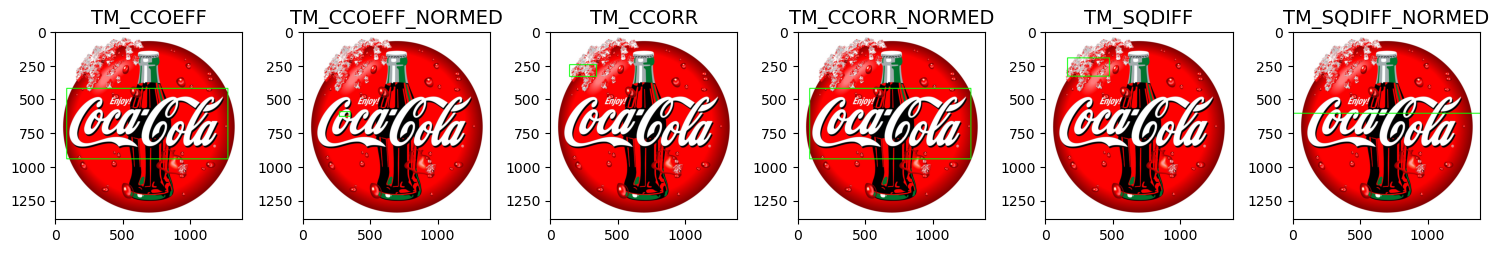

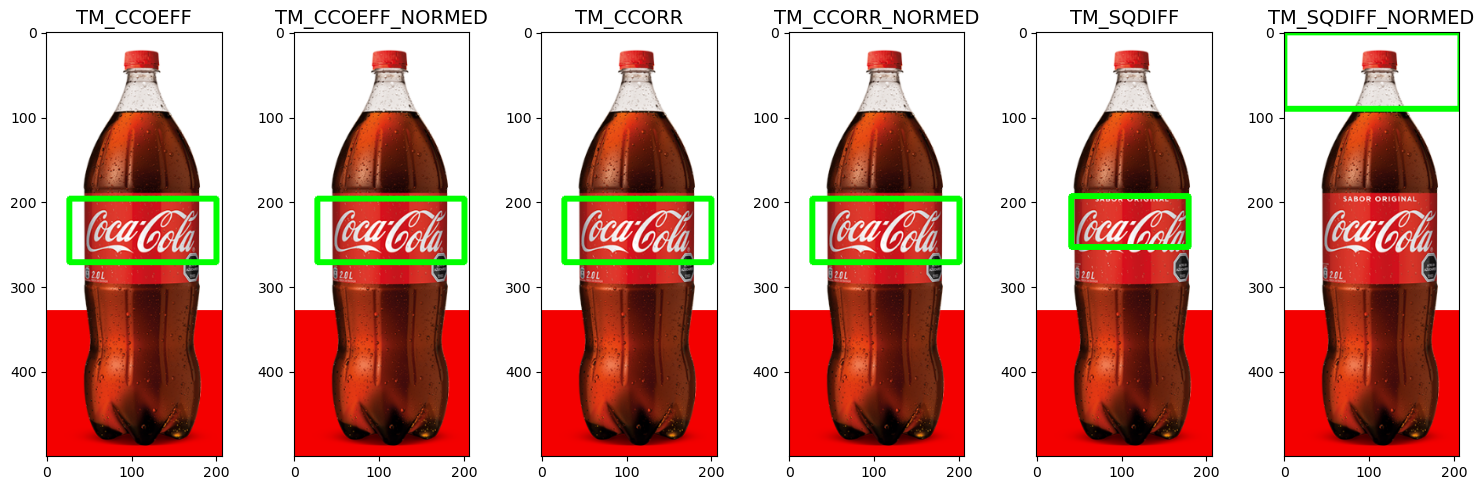

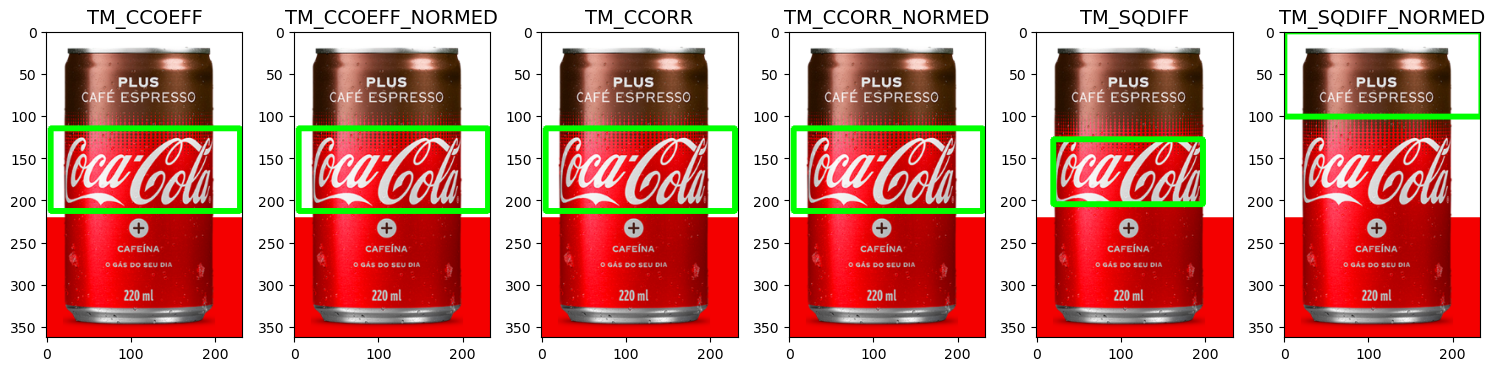

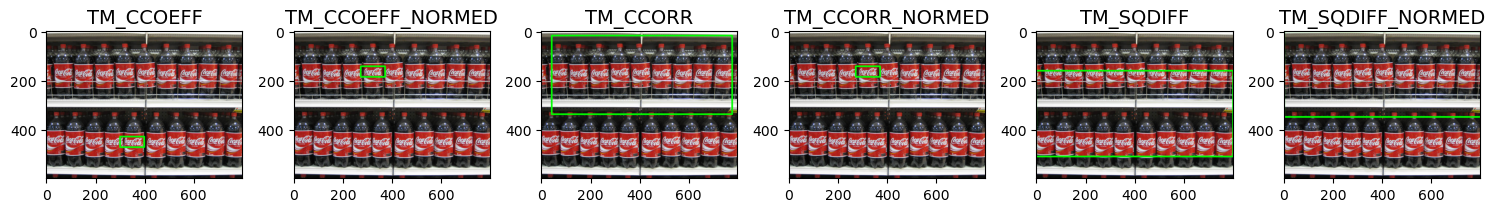

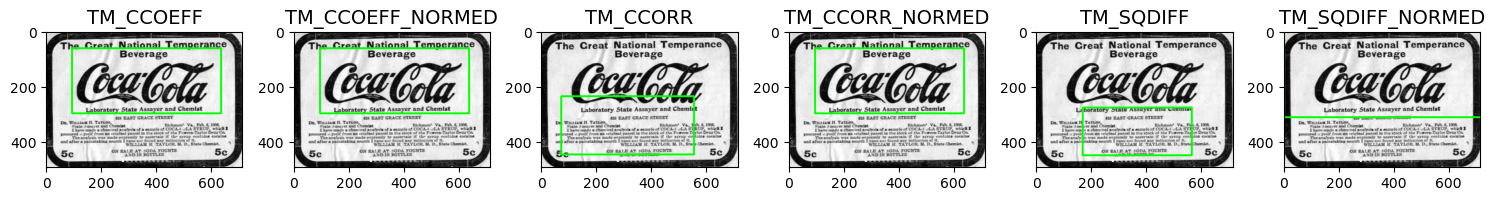

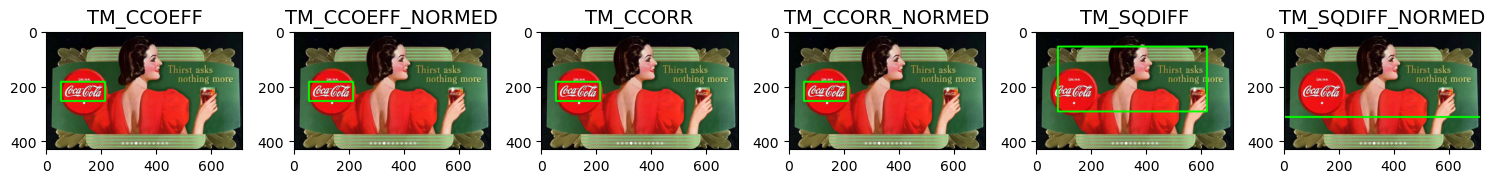

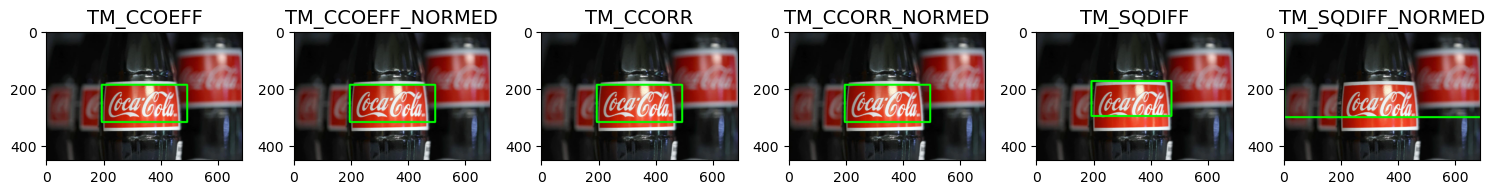

In [5]:
for img in images:
    match_single_template_test_methods(img, template)